## Importing the libraries

In [3]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.compat.v1.losses import sparse_softmax_cross_entropy # For Deprecated Errors

In [6]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier,XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.arima.model import ARIMA
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.decomposition import PCA

In [8]:
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

## Importing/Unzip the Dataset

To get the dataset, run the following command in the terminal:

1- pip install kaggle

2- Create New API Token in Kaggle Account and place the file in C:/Users/<username>/.kaggle/(.json format)

3- run the following command: kaggle datasets download -d jkraak/bitcoin-price-dataset

In [6]:
import zipfile
with zipfile.ZipFile('bitcoin-price-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

In [9]:
main_df = pd.read_csv('dataset/bitcoin_2017_to_2023.csv')

main_df = main_df[::-1]

## Data Analysis

In [10]:
print('Total number of days present in the dataset: ',main_df.shape[0])
print('Total number of fields present in the dataset: ',main_df.shape[1])

Total number of days present in the dataset:  3126000
Total number of fields present in the dataset:  10


In [9]:
main_df.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
3125999,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,7564.906851,3,0.075183,320.390851
3125998,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000,0,0.000000,0.000000
3125997,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1117.542921,2,0.261074,1117.542921
3125996,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,51.171852,3,0.012008,51.171852
3125995,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,599.999338,1,0.140796,599.999338


In [10]:
main_df.tail()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.74657,1.090761e+06,686,16.50452,476955.246611
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.89610,4.595556e+05,483,10.22981,295738.166916
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.52263,3.330532e+05,451,2.70873,78290.170121
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.77589,1.380351e+05,317,2.24546,64899.385195
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.68658,1.354538e+05,258,0.89391,25836.224836


In [10]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126000 entries, 3125999 to 0
Data columns (total 10 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   timestamp                     object 
 1   open                          float64
 2   high                          float64
 3   low                           float64
 4   close                         float64
 5   volume                        float64
 6   quote_asset_volume            float64
 7   number_of_trades              int64  
 8   taker_buy_base_asset_volume   float64
 9   taker_buy_quote_asset_volume  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 238.5+ MB


In [11]:
main_df.describe()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
count,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06
mean,2.008947e+04,2.010217e+04,2.007666e+04,2.008946e+04,5.290800e+01,1.155882e+06,1.018583e+03,2.632231e+01,5.727211e+05
std,1.605896e+04,1.606926e+04,1.604871e+04,1.605896e+04,9.774388e+01,2.335868e+06,1.817813e+03,4.972880e+01,1.193135e+06
min,2.830000e+03,2.830000e+03,2.817000e+03,2.817000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.624747e+03,7.629600e+03,7.620000e+03,7.624798e+03,1.120167e+01,1.122335e+05,1.500000e+02,5.100715e+00,5.125057e+04
50%,1.169999e+04,1.170681e+04,1.169249e+04,1.170000e+04,2.387539e+01,3.706467e+05,4.130000e+02,1.148990e+01,1.753695e+05
75%,2.989957e+04,2.990724e+04,2.989051e+04,2.989957e+04,5.393630e+01,1.276762e+06,1.026000e+03,2.693009e+01,6.210250e+05
max,6.900000e+04,6.900000e+04,6.878670e+04,6.900000e+04,5.877775e+03,1.459557e+08,1.073150e+05,3.537453e+03,8.947551e+07


### Checking for null values

In [12]:
print('Null Values:',main_df.isnull().values.sum())

Null Values: 0


In [13]:
print('NA values:',main_df.isnull().values.any())

NA values: False


In [11]:
sd = main_df.iloc[0].iloc[0]
ed = main_df.iloc[-1].iloc[0]

print('Starting Date:', sd)
print('Ending Date:', ed)


Starting Date: 2017-08-17 04:00:00
Ending Date: 2023-08-01 13:19:00


In [18]:
main_df_explore = main_df.copy()
main_df_explore.set_index('timestamp',inplace=True)
main_df_explore.index = pd.to_datetime(main_df_explore.index)

In [10]:
dashboard_data = main_df_explore[['close', 'volume']].resample('D').last()

fig1 = px.line(dashboard_data, x=dashboard_data.index, y='close', labels={'close':'Bitcoin Close Price'})
fig1.update_layout(title='Bitcoin Close Price Trends', xaxis_title='Date', yaxis_title='Price(USD)')

fig2 = px.bar(dashboard_data, x=dashboard_data.index, y='volume', labels={'volume':'Trading Volume'})
fig2.update_layout(title='Bitcoin Trading Volume', xaxis_title='Date', yaxis_title='Volume')

fig1.show()
fig2.show()

## Data Preprocessing

In [37]:
main_df['timestamp'] = pd.to_datetime(main_df['timestamp'])
main_df['Year'] = main_df['timestamp'].dt.year
main_df['Month'] = main_df['timestamp'].dt.month
main_df['Day'] = main_df['timestamp'].dt.day
main_df['Weekday'] = main_df['timestamp'].dt.weekday
main_df['WeekOfYear'] = main_df['timestamp'].dt.isocalendar().week
main_df['Quarter'] = main_df['timestamp'].dt.quarter
main_df['DayOfYear'] = main_df['timestamp'].dt.dayofyear
main_df['IsWeekend'] = main_df['timestamp'].dt.weekday >= 5
main_df['IsStartOfMonth'] = main_df['timestamp'].dt.is_month_start
main_df['IsEndOfMonth'] = main_df['timestamp'].dt.is_month_end
main_df.index.freq = 'D'

KeyError: 'timestamp'

In [12]:
main_df.set_index('timestamp', inplace=True)

In [13]:
main_df.sample(1)

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
timestamp,,,,,,,,,
2019-11-26 09:02:00,7173.54,7180.01,7168.61,7169.02,25.728074,184555.623956,387,11.690079,83861.232339


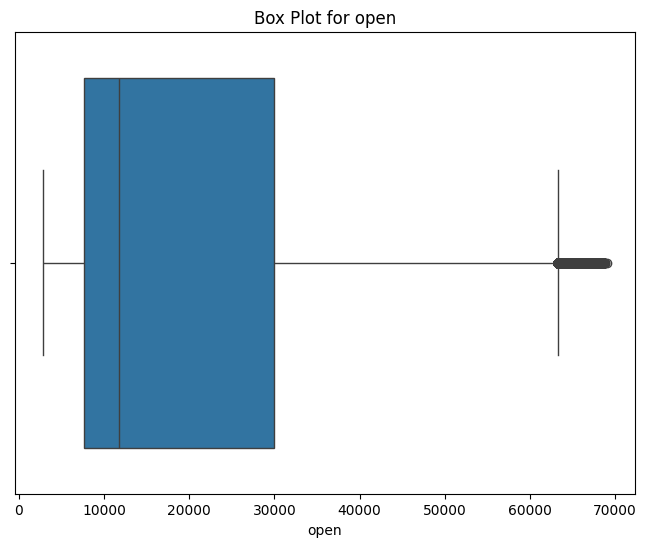

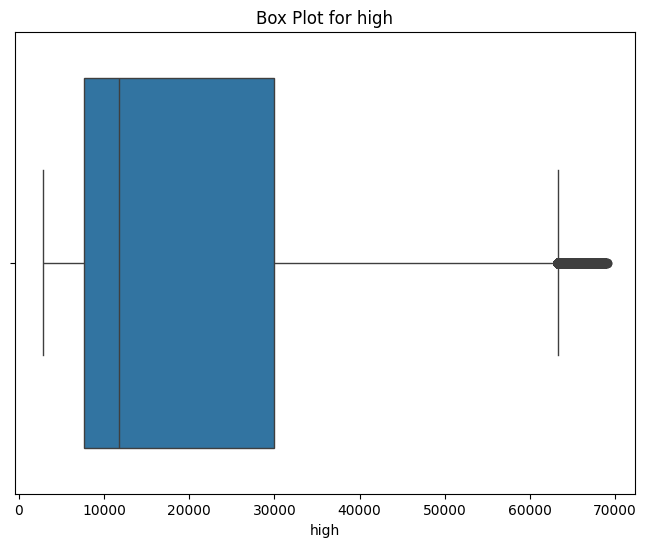

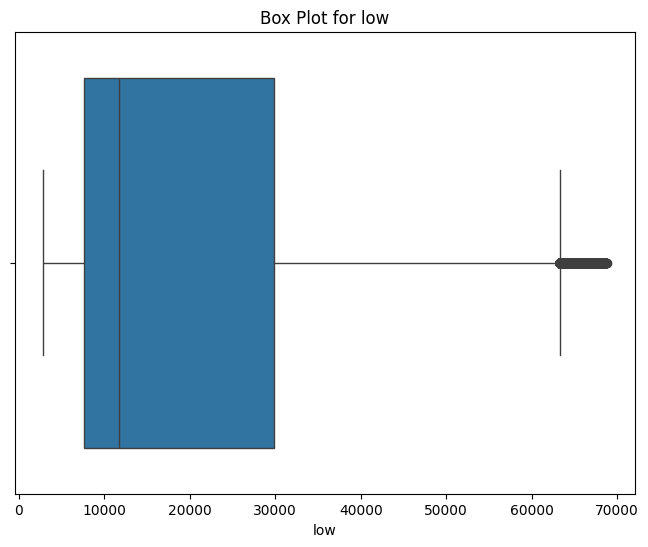

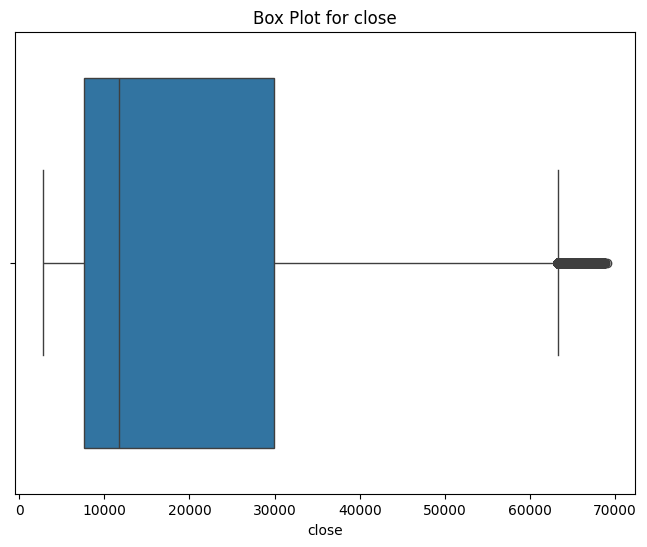

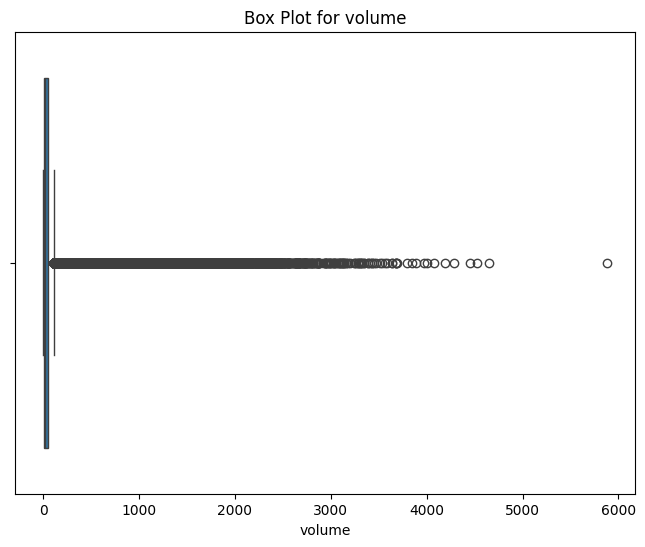

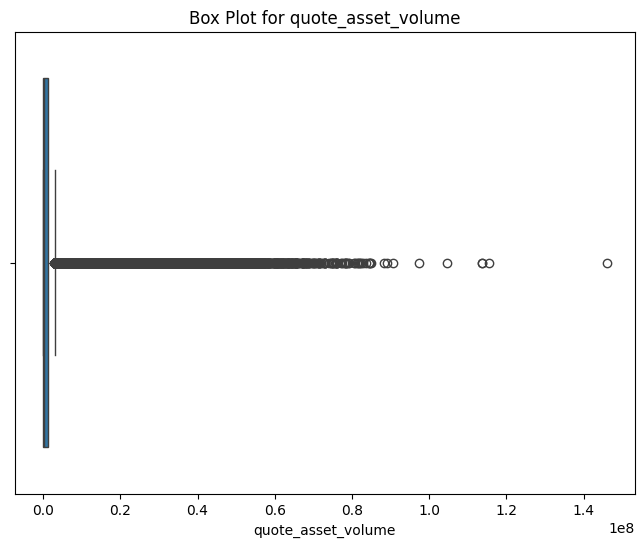

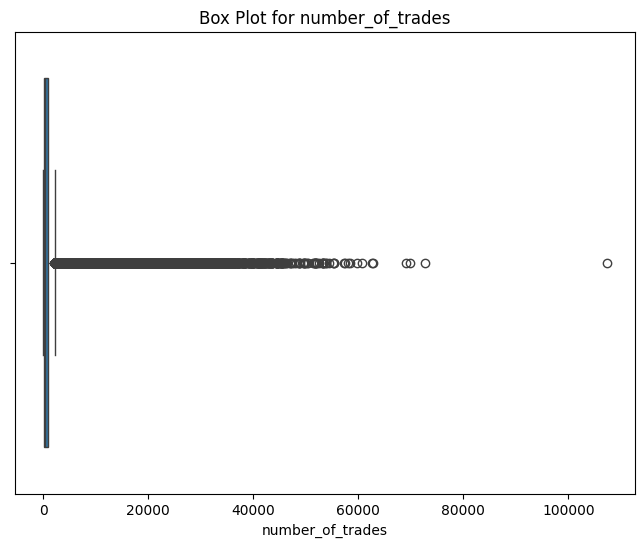

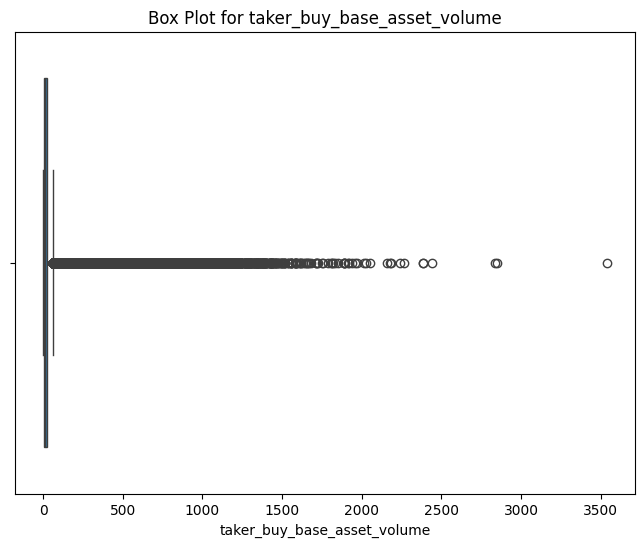

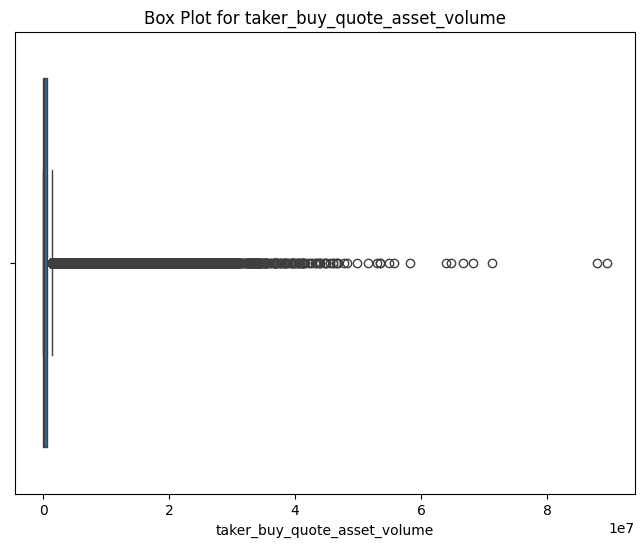

In [10]:
numerical_columns = main_df.select_dtypes(include='number').columns

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=main_df[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

In [14]:
duplicate_rows = main_df[main_df.duplicated()]
print("\nDuplicate Rows:")
if not duplicate_rows.empty:
    print(duplicate_rows)
else:
    print("No duplicate rows found")

main_df_no_duplicates = main_df.drop_duplicates()



Duplicate Rows:
                         open      high       low     close  volume  \
timestamp                                                             
2017-08-17 04:05:00   4261.48   4261.48   4261.48   4261.48     0.0   
2017-08-17 04:06:00   4261.48   4261.48   4261.48   4261.48     0.0   
2017-08-17 04:07:00   4261.48   4261.48   4261.48   4261.48     0.0   
2017-08-17 04:08:00   4261.48   4261.48   4261.48   4261.48     0.0   
2017-08-17 04:09:00   4261.48   4261.48   4261.48   4261.48     0.0   
...                       ...       ...       ...       ...     ...   
2023-03-24 12:35:00  28080.00  28080.00  28080.00  28080.00     0.0   
2023-03-24 12:36:00  28080.00  28080.00  28080.00  28080.00     0.0   
2023-03-24 12:37:00  28080.00  28080.00  28080.00  28080.00     0.0   
2023-03-24 12:38:00  28080.00  28080.00  28080.00  28080.00     0.0   
2023-03-24 12:39:00  28080.00  28080.00  28080.00  28080.00     0.0   

                     quote_asset_volume  number_of_trades  

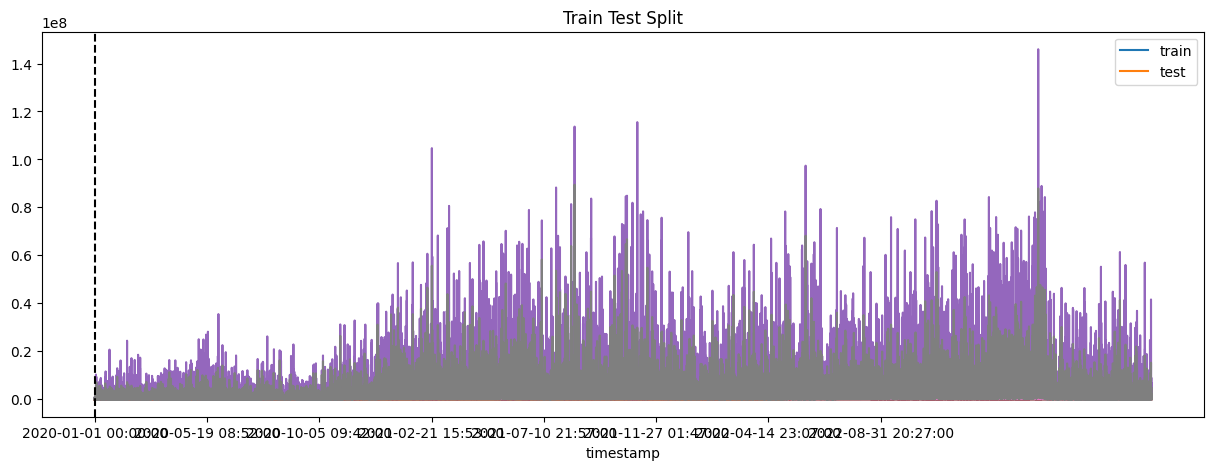

In [15]:
train = main_df_no_duplicates.loc[main_df_no_duplicates.index < "2020-01-01"]
test = main_df_no_duplicates.loc[main_df_no_duplicates.index >= "2020-01-01"]

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax)
test.plot(ax=ax)
ax.axvline("2020-01-01", color='black', ls='--')

plt.legend(["train", "test"])

plt.title('Train Test Split')
plt.show()


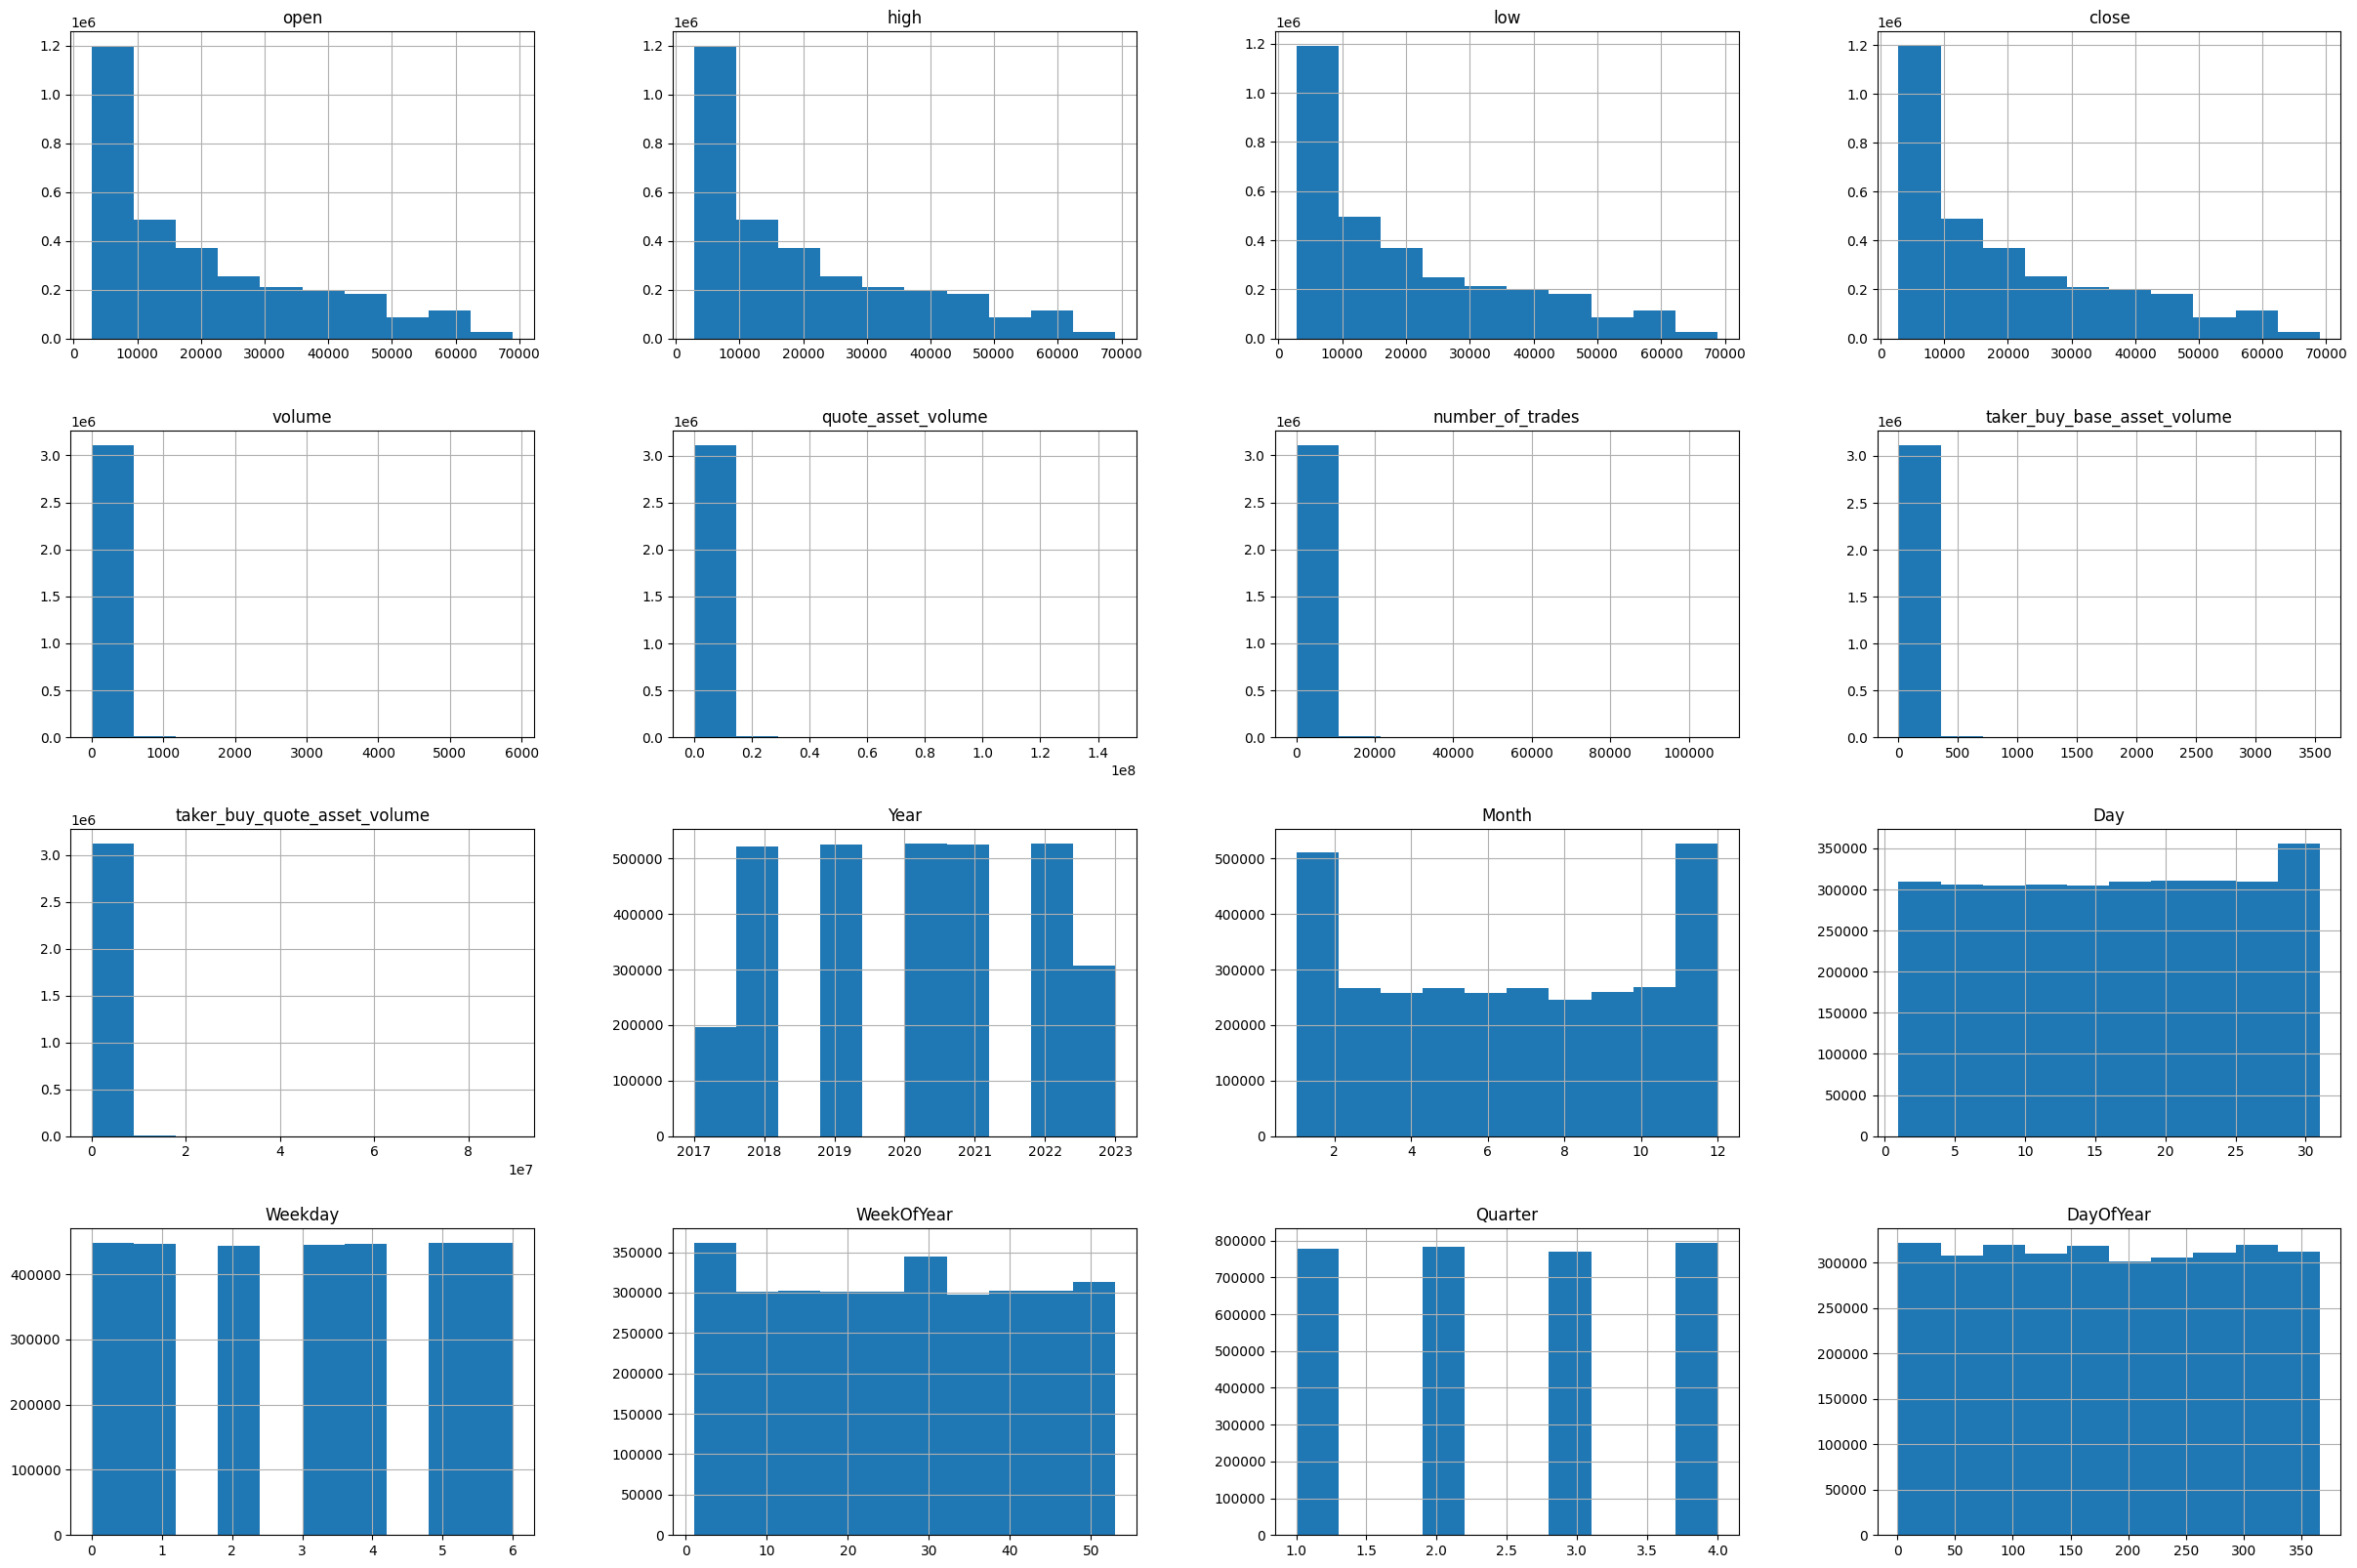

In [16]:
main_df.hist(figsize=(30,20))
plt.show()

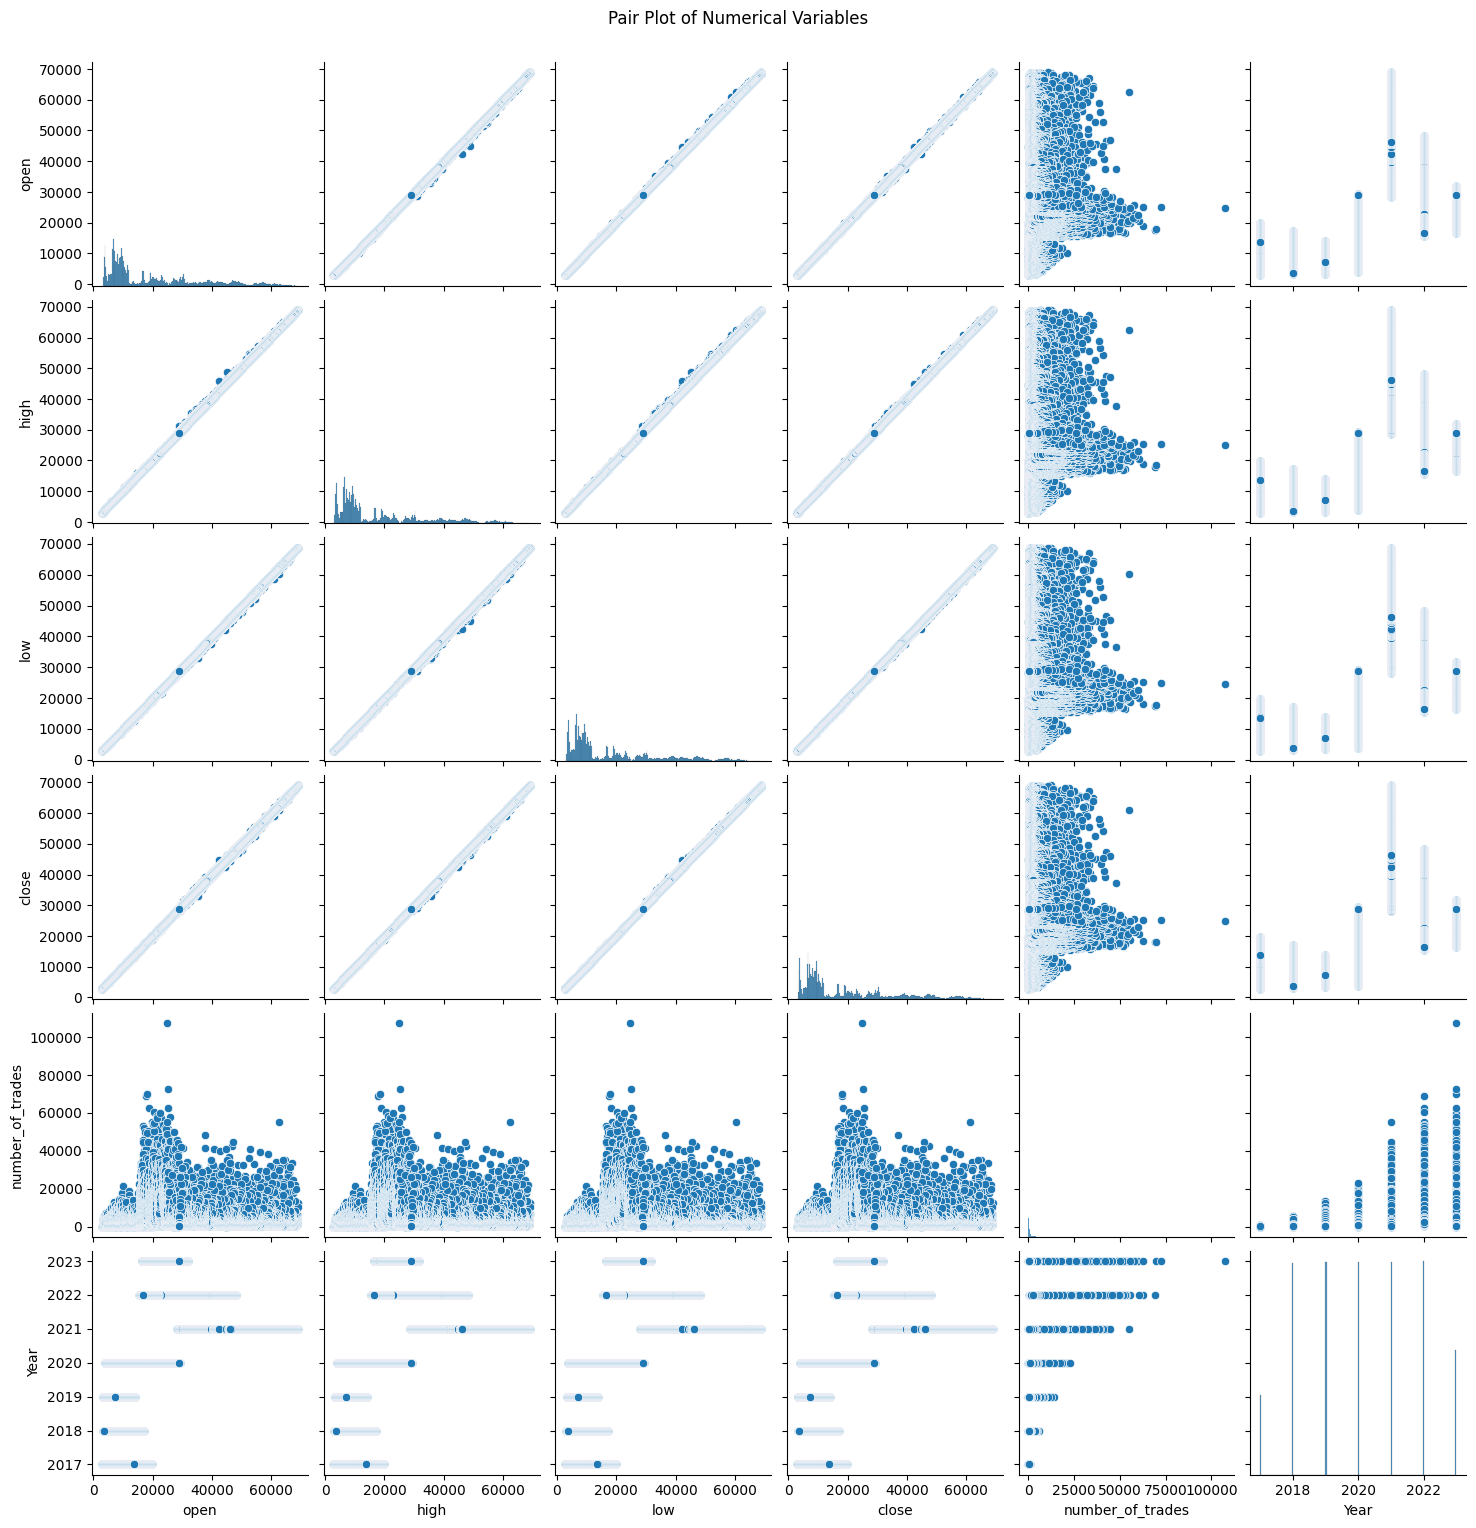

In [19]:
numerical_columns = ['open', 'high', 'low', 'close', 'number_of_trades', 'Year']

sns.pairplot(main_df[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


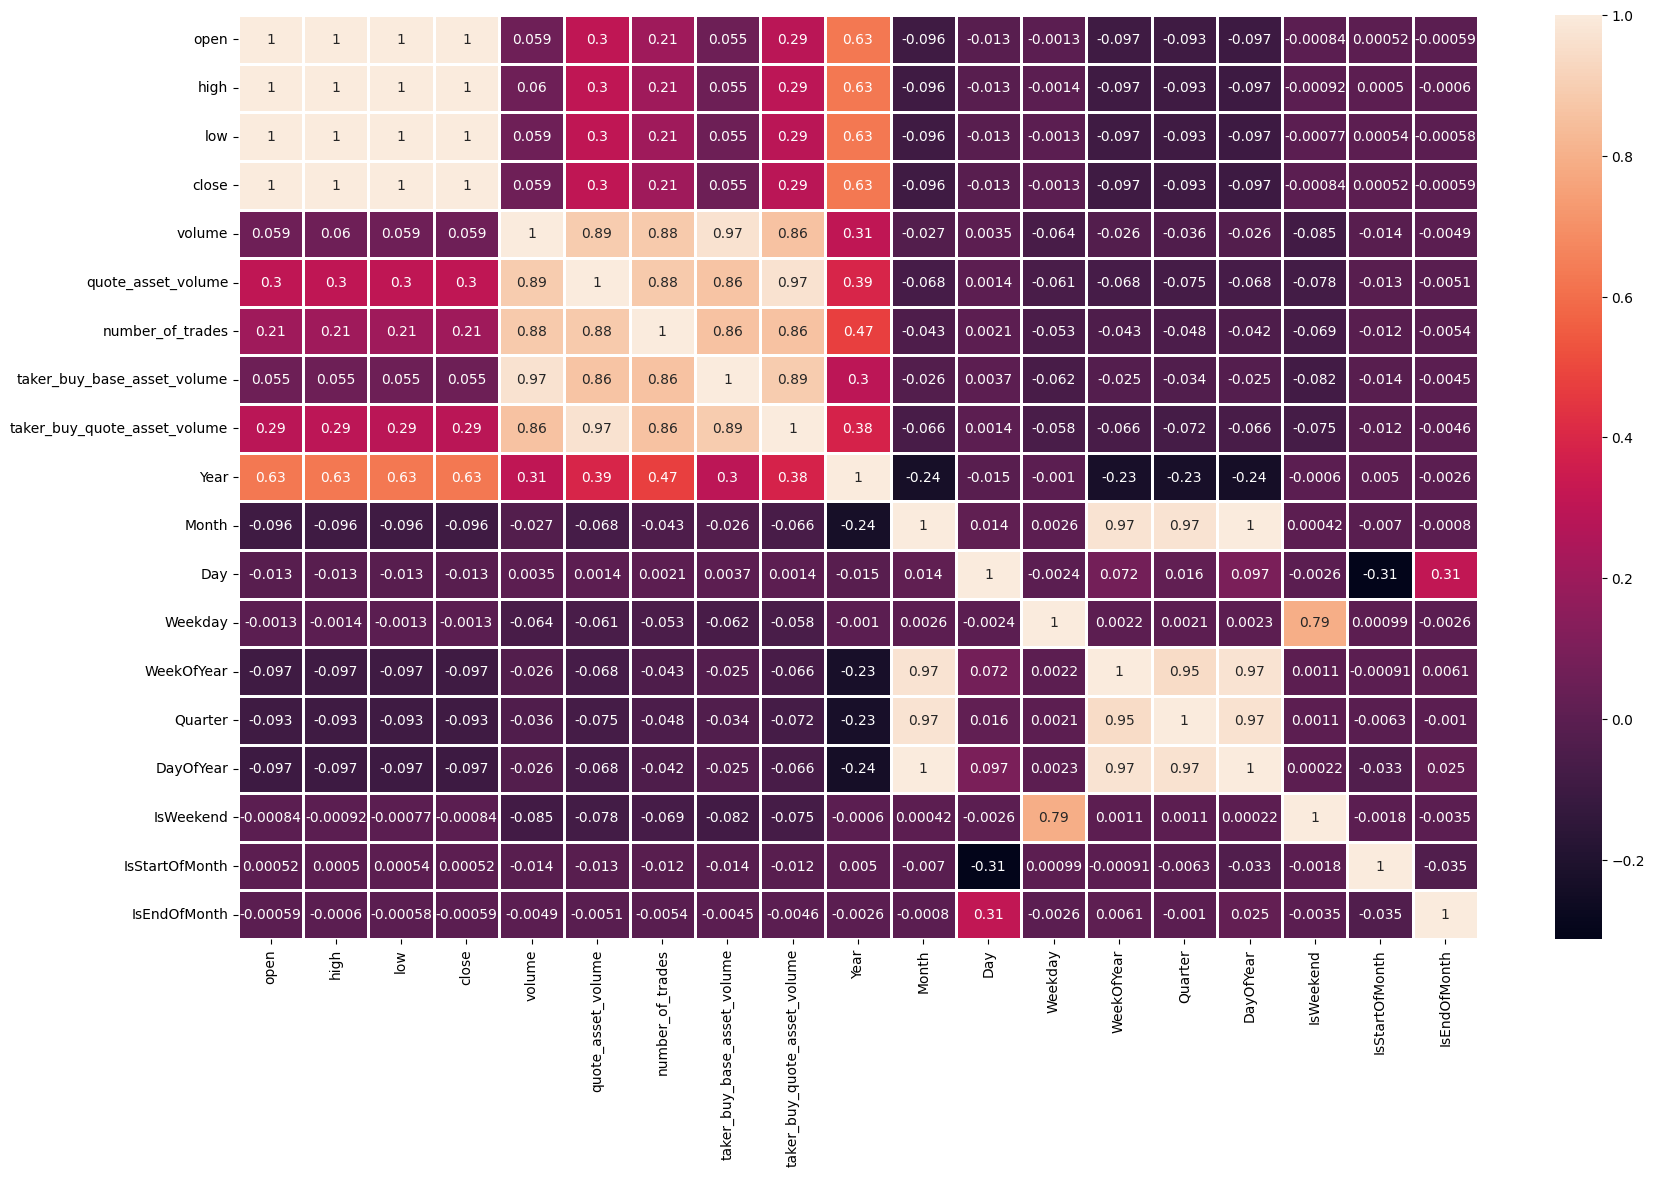

In [20]:
fig,ax=plt.subplots(1,1,figsize=(20,12))
sns.heatmap(main_df.corr(),annot=True,linewidths=1)
plt.show()

Train/Test Split

In [16]:
xtrain = train.drop('close',axis=1)
ytrain =train['close']


xtest = test.drop('close',axis=1)
ytest = test['close']

In [17]:
# scaler = StandardScaler()
# xtrain_scaled = scaler.fit_transform(xtrain)
# xtest_scaled = scaler.transform(xtest)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

xtrain_scaled = scaler.fit_transform(xtrain)

xtest_scaled = scaler.transform(xtest)

# from sklearn.preprocessing import Normalizer

# scaler = Normalizer()

# xtrain_scaled = scaler.fit_transform(xtrain)

# xtest_scaled = scaler.transform(xtest)


In [18]:
outlier_detector = IsolationForest(contamination=0.05, random_state=42)

outliers_mask_train = outlier_detector.fit_predict(xtrain_scaled) == -1

xtrain_no_outliers = xtrain_scaled[~outliers_mask_train]
ytrain_no_outliers = ytrain[~outliers_mask_train]

outliers_mask_test = outlier_detector.predict(xtest_scaled) == -1

xtest_no_outliers = xtest_scaled[~outliers_mask_test]
ytest_no_outliers = ytest[~outliers_mask_test]


print(f"Number of removed outliers in training data: {sum(outliers_mask_train)}")
print(f"Number of removed outliers in test data: {sum(outliers_mask_test)}")

Number of removed outliers in training data: 61325
Number of removed outliers in test data: 1498248


PCA to reduce dimensionality (under work)  --> in most cases provided low accuracy

In [51]:
n_components = 10
pca = PCA(n_components=n_components, random_state=42)
X_train_pca = pca.fit_transform(xtrain_no_outliers)
print("Explained Variance Ratio:", sum(pca.explained_variance_ratio_))
X_test_pca = pca.transform(xtest_no_outliers)

Explained Variance Ratio: 0.9998217496031013


### XGB Regressor Model

In [19]:
model = XGBRegressor(n_estimator=1000,early_stopping_round=50)

model.fit(xtrain_no_outliers, ytrain_no_outliers)

c:\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [22:48:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "early_stopping_round", "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_round=50,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimator=1000,
             n_estimators=None, n_jobs=None, ...)

In [20]:
model.score(xtrain_no_outliers,ytrain_no_outliers) # was 0.9845 --> no outliers removed

0.9999135595805673

In [21]:
p = model.predict(xtest_no_outliers)
p

array([ 7187.5967,  7190.413 ,  7190.4907, ..., 16074.956 , 16230.558 ,
       16231.257 ], dtype=float32)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(ytest_no_outliers, p)
print("Mean Squared Error:", mse)
r2 = r2_score(ytest_no_outliers, p)
print("R-squared (Coefficient of Determination):", r2)

Mean Squared Error: 655.4274749571555
R-squared (Coefficient of Determination): 0.9997679687038303


In [23]:
np.sqrt(mean_squared_error(p,ytest_no_outliers))

25.601317836337167

### ARIMA (AutoRegressive Integrated Moving Average)

In [24]:
arimax_model = ARIMA(endog=ytrain_no_outliers, exog=xtrain_no_outliers, order=(1, 1, 1))
arimax_result = arimax_model.fit()

print(arimax_result.summary())

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


KeyboardInterrupt: 

In [ ]:
arimax_predictions = arimax_result.predict(start=xtest_no_outliers.index[0], end=xtest_no_outliers.index[-1], exog=xtest_no_outliers)

mse = mean_squared_error(ytest_no_outliers, arimax_predictions)
rmse = np.sqrt(mse)

print(f'Test MSE: {mse}')
print(f'Test RMSE: {rmse}')

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(ytrain_no_outliers.index, ytrain_no_outliers, label='Train')
plt.plot(ytest_no_outliers.index, ytest_no_outliers, label='Test')
plt.plot(ytest_no_outliers.index, arimax_predictions, label='Predicted', alpha=0.7)
plt.legend()
plt.title('ARIMAX - Actual vs Predicted Bitcoin Prices')
plt.show()

NameError: name 'sarimax_result' is not defined

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(ytest_no_outliers.index, ytest_no_outliers, label='Actual')
plt.plot(ytest_no_outliers.index, sarimax_predictions, label='Predicted', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted Bitcoin Prices')
plt.show()